<a href="https://colab.research.google.com/github/031wnstjd/Deep-Learning/blob/master/DL_04_Activation_function_%26_Loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL_04 - Activation function & Loss function


In [ ]:
name = input("Name :")
ID = input("student ID :")

Name :추준성
student ID :2016145028


### softmax - 실습 1
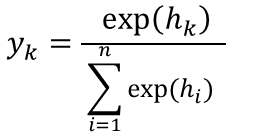</br>
softmax함수를 완성하여 a에 softmax를 취한 값을 출력하고 barplot으로 확인하라

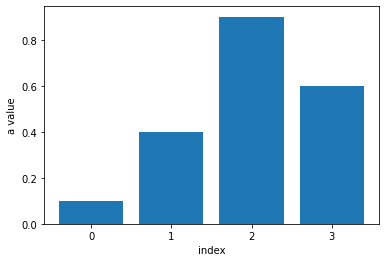

In [ ]:
import torch
import matplotlib.pyplot as plt

a = torch.Tensor([0.1, 0.4, 0.9, 0.6])

plt.bar(range(len(a)),a)
plt.xticks(range(len(a)), range(len(a)))
plt.ylabel('a value')
plt.xlabel('index')
plt.show()

In [ ]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x))

softmax(a)

tensor([0.1607, 0.2169, 0.3576, 0.2649])

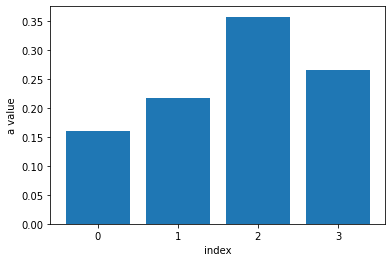

In [ ]:
y = softmax(a)
plt.bar(range(4),y)
plt.xticks(range(4), range(4))
plt.ylabel('a value')
plt.xlabel('index')
plt.show()

### 실습 2

아래와 같은 2-layer MLP를 구현하시오.</br>```forward``` : y값을 입력하면 loss값을 출, y값을 입력하지 않으면 softmax값을 출력 </br>
_(input_value와 label변경 금지 </br> 초기 weight&biase값과 random seed 변경 금지)_</br>
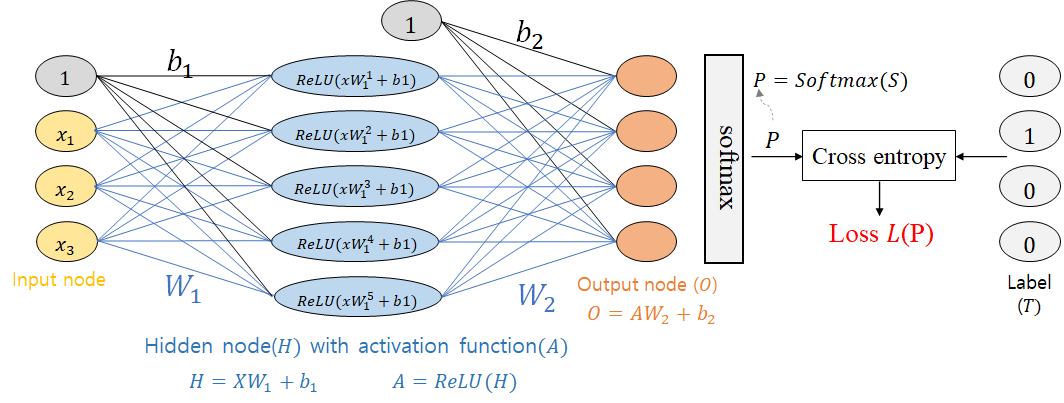

In [ ]:
import torch

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, std=1e-4):
    self.params = {}
    
    torch.manual_seed(0)
    self.params["W1"] = torch.rand(input_size,hidden_size)
    self.params["b1"] = torch.rand(hidden_size)
    self.params["W2"] = torch.rand(hidden_size, output_size)
    self.params["b2"] = torch.rand(output_size)
  
  def relu(self, x):
    return torch.max(torch.zeros_like(x),x)

  def softmax(self, x):
    return torch.exp(x) / torch.sum(torch.exp(x)) 

  def cross_entropy(self, y_pred, y):
    return -torch.sum(y*torch.log(y_pred+1e-7))

  def forward(self, X, y = None):

    W1, b1 = self.params["W1"], self.params["b1"]
    W2, b2 = self.params["W2"], self.params["b2"]
    
    H = torch.matmul(X, W1) + b1
    A = self.relu(H)
    O = torch.matmul(A, W2) + b2
    P = self.softmax(O)

    if y==None:
      return P
    else:
      Loss = self.cross_entropy(P, y)
      return Loss
    


In [ ]:
input_value = torch.Tensor([0.9,1.3,0.2])

In [ ]:
two_mlp = TwoLayerNet(3, 5, 4)

In [ ]:
# softmax value
two_mlp.forward(input_value)

tensor([0.0609, 0.4248, 0.3067, 0.2076])

In [ ]:
# cross entropy 
two_mlp.forward(input_value,y=torch.Tensor([0,1,0,0]))

tensor(0.8561)